## Application of SVD: Whitening
In this notebook we will explore one application of Singular Vector Decomposition(SVD) which deals with whitening of data. Whitening is used to decorrelate signlas between data points, and we will explore how the decorrelation works in this notebook!

We will first start out by defining our methods which will be used. Note that this notebook follows from the question two of section 08 handout.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining our plotting function
def plot(x, set1, set2, x_lim, y_lim, title): #Set1: Red Points, Set2: Blue Points
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    ax.scatter(x[set1, 0], x[set1, 1], s=20, c="red", alpha=0.2)
    ax.scatter(x[set2, 0], x[set2, 1], s=20, alpha=0.2)
    ax.set_aspect("equal")
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(title)
    
def demean(X):
    # Note that this is the same as J = (I - 11^T/n)
    ones = np.ones((X.shape[0], 1))
    J = np.identity(X.shape[0]) - ((np.matmul(ones, ones.T)) / X.shape[0])
    return np.matmul(J, X)

def project(X, V_trans):
    # Note that this is the same as V
    return np.matmul(X, V_trans.T)

def scale(X, S):
    # Note that this is the same as S^{-1}
    return np.multiply(X, (1 / S))

def unrotate(X, V):
    # Note that this is the same as V^{T}
    return np.matmul(X, V)

We will first begin by generating data from the multivarite guassian. In this case our gaussian is a 2d gaussian.

In [2]:
np.random.seed(1)
mu = [10, 10]
sigma = [[5, 4], [4, 5]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, size=n).T
x = x.T

We will then get the indices of the most extreme points for see how the datapoints actually changes, to give the viewer a sense of direction.

In [3]:
set1 = np.arange(x.shape[0])
set2 = list(set(range(n)) - set(set1))

This is the original data point that we obtained before any whitening.

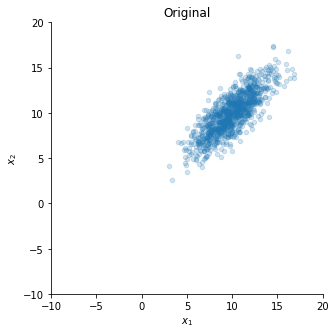

In [4]:
plot(x, set2, set1, [-10, 20], [-10, 20], 'Original')

The first thing we might want to start doing is to demean the data so that we can project it to the singular basis later.

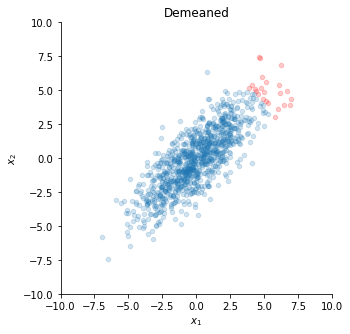

In [5]:
x_demean = demean(x)
set1 = np.argsort(np.linalg.norm(x_demean, axis=1))[-40:]
set_t = np.where(x_demean[set1, 0] > 0)
set1= set1[set_t]
set2 = list(set(range(n)) - set(set1))

plot(x_demean, set1, set2, [-10, 10], [-10, 10], 'Demeaned')

We will now do the projection of the datapoints into the singular basis vectors. We will first obtain the basis vectors by applying SVD on the dataset.

In [6]:
U, S, V_trans = np.linalg.svd(x_demean)

Note that we will project the data points to the singular basis, and the data points are essentially "rotated".

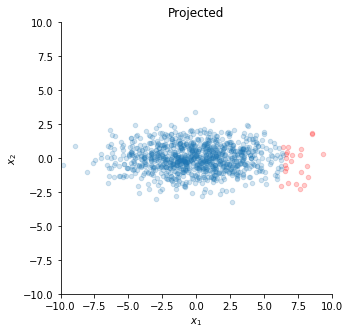

In [7]:
x_proj = project(x_demean, V_trans)
plot(x_proj, set1, set2, [-10, 10], [-10, 10], 'Projected')

We will now start to scale the projected data points, this is the "Whitening" part where we decorrelate the feature dimensions of the datapoints such that their 

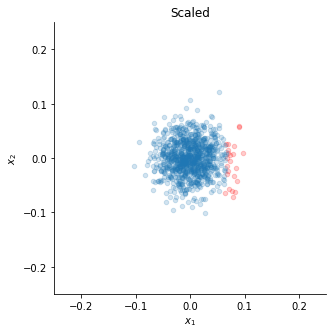

In [8]:
x_scaled = scale(x_proj, S)
plot(x_scaled, set1, set2, [-0.25, 0.25], [-0.25, 0.25], 'Scaled')

Now, to recover the original orientation, we will "unrotate" the points back. Intuitively, you can think of $V^{T}$ as the oposite basis that we will be projecting into. Remember that we projected to $V$ before now we are projecting back to $V^{T}$

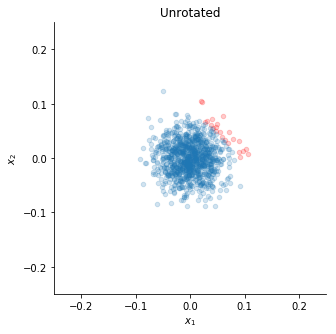

In [9]:
x_unrotate = unrotate(x_scaled, V_trans)
plot(x_unrotate, set1, set2, [-0.25, 0.25], [-0.25, 0.25], 'Unrotated')

We have successfully decorrelate the different feature dimension of the data. Note that this means that after the whitening process it is as if we are sampling data from a multivariate gaussian with covriance identity matrix!